# import libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
%matplotlib inline

# use pd.read_csv to read file  

In [51]:
df_swing = pd.read_csv('2008_swing_states.csv')
df_swing[['state','county','pct_dem']]

,state,county,pct_dem
0,AL,Autauga County,25.80
1,AL,Baldwin County,23.80
2,AL,Barbour County,49.00
3,AL,Bibb County,26.60
4,AL,Blount County,14.50
5,AL,Bullock County,74.10
6,AL,Butler County,43.10
7,AL,Calhoun County,33.20
8,AL,Chambers County,45.50
9,AL,Cherokee County,23.70


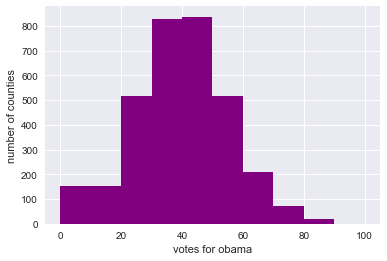

In [52]:
df_states=df_swing[df_swing.state == 'OH']
df_states.append(df_swing[df_swing.state == 'PA'])
df_states.append(df_swing[df_swing.state == 'FL'])

df_pct_dem = df_swing['pct_dem']

bin_edges = [0,20,30,40,50,60,70,80,90,100]
_=plt.hist(df_pct_dem,bins = bin_edges , color="purple" )
_=plt.xlabel('votes for obama')
_=plt.ylabel('number of counties')
plt.show()

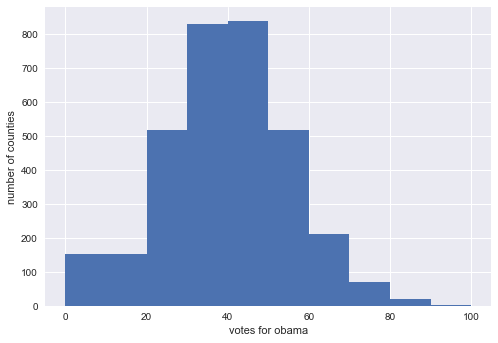

In [53]:
sns.set()
_=plt.hist(df_swing['pct_dem'], bins = bin_edges)
_=plt.xlabel('votes for obama')
_=plt.ylabel('number of counties')
plt.show()

In [54]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

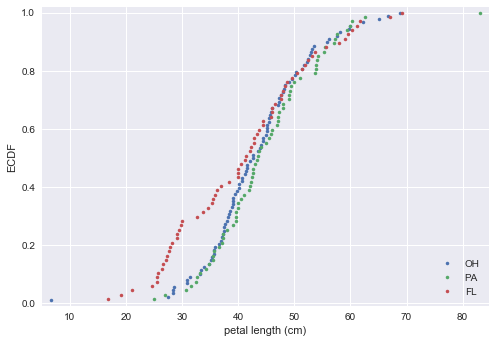

In [55]:
# Compute ECDF for versicolor data: x_vers, y_vers
df_OH = df_states[df_states.state == 'OH']
df_FL = df_swing[df_swing.state == 'FL']
df_PA = df_swing[df_swing.state == 'PA']
x_OH, y_OH = ecdf(df_OH['pct_dem'])
x_PA, y_PA = ecdf(df_PA['pct_dem'])
x_FL, y_FL = ecdf(df_FL['pct_dem'])

# Generate plot
_ = plt.plot(x_OH, y_OH, marker='.', linestyle='none')
_ = plt.plot(x_PA, y_PA, marker='.', linestyle='none')
_ = plt.plot(x_FL, y_FL, marker='.', linestyle='none')
# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.legend(('OH', 'PA', 'FL'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()